# Setup Environment

In [1]:
# Install specific libraries
! pip install transformers
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.0 MB/s eta

In [2]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
# specify GPU
device = torch.device("cuda")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Deep learning project

/content/drive/MyDrive/Deep learning project



# Dataset

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data['news'][0]

'\nتہران (این این آئی) بین الاقوامی مالیاتی مواصلات ایسوسی ایشن یعنی سوفٹ نظام ایران کے خلاف امریکی پابندیوں کے نفاذ  سوفٹ میں اپنی جانب سے عملی اقدامات کا آغاز کردیا ہے کی طرف سے ایرانی بنکوں پر پابندیاں عاید کی جا رہی ہیں اور ایرانی بنکوں کو ترسیلات زر پر پابندی لگانے کا عمل شروع کردیا گیا ہے سوفٹ کے اس اقدام کا مقصد ایرانی بنکوں کو عالمی مالیاتی نیٹ ورک میں تنہا کرنا اور امریکا کی طرف سے تہران پر عاید کی جانے والی پابندیوں کوموثر اور نتیجہ خیز بنانا ہے عرب ٹی وی کے مطابق برسلز میں قائم سوفٹ کے صدر دفتر سے جاری ایک بیان میں کہا گیا ہے کہ اگرچہ کمپنی کو ایران کے خلاف فیصلوں پر افسوس ہے مگر عالمی مالیاتی ترسیلات کو شفاف بنانے اور سوفٹ سسً کے استحکام اس کے مفاد اوراس کی شفافیت کو یقینی بنانے کے لیے امریکی پابندیوں میں واشنگںٹن کا ساتھ دینا ضروری ہے سوفٹ بنک کی طرف سے یہ موقف امریکی وزیر خزانہ اسٹیفن منوچین کے جاری ہونے والے بیان کے بعد سامنے آیا ہے امریکی وزیرخزانہ نے کہا تھا کہ ان کا ملک سوموار سے ایران پر سابقہ پابندیوں کی دوسری قسط بحال کررہا ہے اس کے بعد ایران کے ساتھ لین دینے کرنے 

In [7]:
data.head(3)

,news,label
0,\nتہران (این این آئی) بین الاقوامی مالیاتی موا...,0
1,تصویر کے کاپی رائٹ Getty Images Image caption ...,0
2,ویب ڈیسک:انٹر نیٹ کا استعمال کرنے والے صارفین ...,0


([<matplotlib.patches.Wedge at 0x7a3d591ea8c0>,
 [Text(-1.1860462902972189, 0.1824669758400283, 'Fake'),
  Text(1.1860462902972189, -0.1824669758400279, 'True')],
 [Text(-0.6918603360067109, 0.10643906924001649, '45.1%'),
  Text(0.6918603360067109, -0.10643906924001628, '54.9%')])

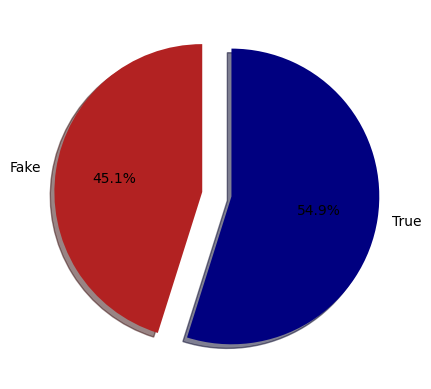

In [8]:
# Checking if our training data is well balanced
label_size = [data['label'].sum(),len(data['label'])- data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

## Train-test split

In [12]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['news'], data['label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    )
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

# BERT model




## Load pre-trained BERT model

In [10]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Prepare input data

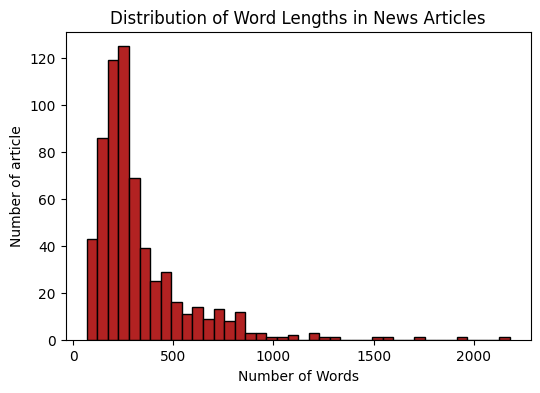

In [14]:
# Calculate the length of words in each article:

seq_len = [len(title.split()) for title in data['news']]

# Histogram to visualize the distribution of word lengths
plt.figure(figsize=(6, 4))
plt.hist(seq_len, bins=40, color='firebrick', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Number of Words')
plt.ylabel('Number of article')
plt.title('Distribution of Word Lengths in News Articles')
plt.show()


In [16]:
MAX_LENGTH = 250  # BERT's maximum token limit

# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=MAX_LENGTH,
    pad_to_max_length=True,
    truncation=True,
    return_tensors='pt'  # Ensure PyTorch tensors are returned
)

# Tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=MAX_LENGTH,
    pad_to_max_length=True,
    truncation=True,
    return_tensors='pt'  # Ensure PyTorch tensors are returned
)

# Tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=MAX_LENGTH,
    pad_to_max_length=True,
    truncation=True,
    return_tensors='pt'  # Ensure PyTorch tensors are returned
)


In [17]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [18]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

## Freeze layers

In [19]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

## Define Model architecture

In [20]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function

    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)

# Defining the hyperparameters (optimizer, weights of the classes and the epochs)

# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 2

## Define Train & Evaluate Function

In [21]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

## Model training

In [22]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss <= best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 2

Evaluating...

Training Loss: 0.692
Validation Loss: 0.695

 Epoch 2 / 2

Evaluating...

Training Loss: 0.689
Validation Loss: 0.708


## Model performance

In [25]:
# load weights of best model
path = 'c2_new_model_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [26]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        46
           1       0.00      0.00      0.00        50

    accuracy                           0.48        96
   macro avg       0.24      0.50      0.32        96
weighted avg       0.23      0.48      0.31        96



In [27]:
unseen_news_text = ["مرد حضرات کے جسمانی صافیوں سے ان کا چال چلن خواتین سے مختلف ہوتا ہے مرد حضرات کا چارجر خواتین سے اس لیے مختلف ہوتا ہے کیونکہ یہ بڑے بڑے قدم لیتے ہیں خواتین سے مختلف ہونے کی اور بھی بہت سی وجوہات ہیں ان میں سب سے بڑی وجوہات جسمانی ساخت بھی ہے مرد جسمانی طور پر بڑے ہوتے ہیں اس لئے ان کے لئے بڑے بڑے قدم لینا ایک عام سی بات ہے اور خواتین کے مقابلے میں زیادہ تیز چلتے ہیں اس کی بڑی وجہ بھی جوتوں کی قسم ہے مرد پرسکون جوتے پہنتے ہیں کچھ مواقعوں پر مرد اور خاتون کی چال کا انداز ایک ہو مگر عام طور پر یہ فرق واضح ہوتا ہے اور اس کی وجہ سمجھنا بھی آسان ہے اور وہ دونوں کے جسمانی ساخت کا فرق ہے تحقیق میں یہ بھی بتایا گیا کہ خواتین کے ساتھ چلتے ہوئے مرد اکثر اپنی رفتار سست نہیں کرتے جبکہ بچوں کے ساتھ وہ ان کا خیال رکھنے والا رویہ اپناتے ہیں اور ان کی رفتار کے مطابق چلتے ہیں ایسا خواتین کبھی بھی نہیں کرتی ہیں مرد جسمانی طور پر خواتین سے بڑے ہوتے ہیں اور ان کے جسم جسمانی کاموں کے لیے بنے ہوتے ہیں تو چلنا مردوں کے لیے نفسیاتی طور پر ایک اہم نکتہ ہوتا ہے یعنی چلنے کا مقصد کسی مخصوص فعل کا حصول ہوتا ہے جیسے ایک سے دوسری جگہ پہنچنا مرد حضرات سیدھا اور ایک لائن میں چلتے ہیں دوسری جانب خواتین کی چال باوقار ہوتی ہے اور چھوٹے قدم چلتی ہیں اور بہت کم ہوتا ہے جب وہ لمبا قدم چلیں بنیادی طور پر خواتین کے چلنے کے انداز اور جسمانی حرکت پر برسوں کا ارتقا اثرانداز ہوتا ہے مردوں اور خواتین کے جوتوں کا فرق بھی چال پر اثرانداز ہوتا ہے مثال کے طور پر مرد جوگر پہنتے ہیں جس سے انہیں بہت تیز چلنے میں مدد ملتی ہے اس کے مقابلے میں خواتین ہائی ہیل یا معمولی ہیل کا جوتا بھی پہن لیں تو ان کے لیے چلنا مشکل ہوجاتا ہے یہ فرق تو سب کے لیے واضح ہے کہ مرد لمبے ڈگ بھرتے ہیں اور ٹانگ کو جتنا آگے بڑھا سکتے ہیں بڑھاتے ہیں جس سے وہ کم وقت میں زیادہ فاصلہ طے کرلیتے ہیں اور یہی وجہ ہے کہ وہ خواتین کے مقابلے میں چلتے ہوئے بازﺅں اور کندھوں کو زیادہ حرکت دیتے ہیں خواتین چھوٹے قدم چلتی ہیں اور ٹانگوں کو قریب رکھتی ہیں",     # True
                    "نیو یارک (ڈیلی پاکستان آن لائن) فوٹو شیئرنگ ویب سائٹ انسٹا گرام نے ایسی تصاویر اور ویڈیوز پر پابندی عائد کرنے کا فیصلہ کرلیا ہے جن میں نظر آنے والے افراد خود کو نقصان پہنچا رہے ہوں یہ پابندی اس 14 سالہ لڑکی کے والدین کی جانب سے چلائی جانے والی مہم کے باعث لگائی جارہی ہے جس نے 2017 میں خود کشی کرلی تھی انسٹاگرام کے ہیڈ ایڈم موسیری نے اپنے ایک بلاگ میں کہا کہ ان کیلئے اپنی کمیونٹی کے لوگوں کی حفاظت سے زیادہ کچھ بھی ضروری نہیں ہے گزشتہ ایک ماہ کے دوران ہم نے اس بات کا اندازہ لگایا کہ ہم نے خود کو نقصان پہنچانے والے یا خود کشیوں پر مبنی مواد کے حوالے سے وہ نہیں کیا جو کرنا چاہیے تھا ہمیں انسٹاگرام کو لوگوں کیلئے محفوظ تر بنانے کیلئے ابھی بہت سے اقدامات اٹھانے ہیں انہوں نے کہا کہ انسٹاگرام کی جانب سے تشدد پر مبنی مواد کی صرف اس لیے اجازت دی گئی تھی تاکہ لوگ اپنے مسائل کو زیادہ بہتر انداز میں بیان کرسکیں کمپنی نے کبھی اس بات کی اجازت نہیں دی کہ خود پر تشدد پر اکسانے والے مواد کو بڑھاوا دیا جائے لیکن اب ہم پالیسی تبدیل کرنے جارہے ہیں اور نئی پالیسی کے تحت انسٹاگرام پر تشدد پر مبنی کوئی تصویر پوسٹ نہیں کی جاسکے گی خیال رہے کہ مولی رسل نامی 14 سالہ لڑکی انسٹاگرام پر موجود تشدد پر مبنی مواد کے باعث شدید ذہنی تناﺅ کا شکار ہوگئی تھی اور اس نے 2017 میں اپنے ہی ہاتھوں اپنی زندگی کا خاتمہ کرلیا تھا مولی رسل کی خود کشی کے بعد اس کے والدین نے انسٹاگرام سے تشدد پر مبنی مواد کے خاتمے کیلئے مہم چلائی تھی",               # Fake
                    ]
# tokenize and encode sequences in the test set
MAX_LENGHT = 250
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()
preds = np.argmax(preds, axis = 1)
preds

array([0, 0])